## Assignment 6 - Deadline: Dec 9, 2024, Mon 11pm

#### DSAI 510 Fall 2024

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.boun.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [23]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os, time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,roc_curve,auc


# Set the display option to show all rows scrolling with a slider
pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if they ask "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Problem 1: Modeling heart disease dataset with different binary classifiers (50 pts)

Here's the heart disease dataset info:<br>

Age: age of the patient [years] <br>
Sex: sex of the patient [M: Male, F: Female]<br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br>
Cholesterol: serum cholesterol [mm/dl]<br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal]<br>

**TASKS to be done:**

Note: Read all of the tasks first to get an idea of the process before you begin completing them.
We'll train binary classifiers to predict the target HeartDisease, which can be 0 or 1.
1) Clean the dataset (handle duplicate records, missing values etc. if any)
2) Do EDA: Create the pairplots ( we've done it before) by using `sns` package and also create the colored correlation matrix that shows correlation value between the features. Make each cell include the correlation value and color it according to that value (we've done it before).
3) Split the dataset as train, validation and test.
4) Standardize (mean=0, std=1) all numerical columns (not categorical ones!). To do this, we will learn the transformation parameters (mean and std) from the train df_heart, then use these two parameters to transform train, validation and test datasets. Notice that we're not using the whole dataset's (train+val+test) mean and std values to standardize. This would create what's called "df_heart leakage". You'd want to avoid using some info from val and test dataset to transform the train dataset. No information should leak to our training process from the val and test datasets as val and test datasets are considered unknown during the training phase. You can read more about this from here: https://towardsdatascience.com/the-dreaded-antagonist-df_heart-leakage-in-machine-learning-5f08679852cc . 

The correct scaling idea is shown below--but remember, you should standardize only the numerical columns, not the categorical ones or their one-hot encoded versions. So you need to substitute "columns" in the code below with positions of the numerical columns, e.g., columns = [0, 2, 4].

```
columns = [?, ?, ...]
sc = StandardScaler()
sc.fit(X_train[:, columns])  # Learn mean and std from only train set.
X_train[:, columns] = sc.transform(X_train[:, columns])
X_val[:, columns] = sc.transform(X_val[:, columns])
X_test[:, columns] = sc.transform(X_test[:, columns])
```
5) Now apply on training df_heart (i) logistic regression, (ii) k-NN, (iii) linear SVM, (iv) kernel SVM, (v) naive Bayes, (vi) decision tree (single tree), (vii) random forest, (viii) gradient boosted trees and (ix) xgboost as binary classifiers (try to tune hyperparameters to avoid underfitting and overfitting to get the best out of each model). Calculate accuracy, sensitivity (recall), specificity, precision and F1 scores for each model on the validation set. Display your results in a summary table each row will include the model name and associated evaluation metrics (performance metrics) from the validation set.

6) Show the ROC curves for each model on the same plot (except SVM models) by indicating which curve belongs to which model by using a legend (preferably, color coded). Interpret the ROC curves. Which one is the best?

7) Now you will choose the best model among the ones you used in the previous step. For each model, some performance metrics may be high but some may be low. So, you need to decide on a performance metric based on your aim before looking at these metrics' values. **Your aim here is to identify everyone with even a slight possibility of having a heart attack, as heart attacks are often fatal.** Which performance metric is the most suitable for this problem among accuracy, sensitivity (recall), specificity, precision, F1 score and ROC? There may not be a single answer; choose the one that you think is the most suitable. Explain why you choose that particular metric? Warning: Here we are deciding on the metric based on our aim mentioned above; we're not choosing a metric that has maximum value!

8) Now find among the trained models that has the maximum value of the performance metric, which you chose in the previous step.

9) Now you've chosen your best predictive model, calculate its performance metric, which you chose previously, on the test dataset. You can announce to the world this test metric as your best model's predictive power.





In [4]:
df_heart = pd.read_csv('./heart.csv')

quantitative_columns = [f for f in df_heart.columns if df_heart.dtypes[f] != 'object']
categorical_columns = [f for f in df_heart.columns if df_heart.dtypes[f] == 'object']
binary_vars = [f for f in quantitative_columns if df_heart[f].nunique() == 2]

print(binary_vars)
print(quantitative_columns)

heart = df_heart.copy()
heart[categorical_columns] = heart[categorical_columns].astype('category')

display(heart.sample(10))
display(heart.dtypes)
display(heart.describe())
print(f'\nNull values {heart.isna().sum().sum()}')
print(f'\nNA values {heart.isnull().sum().sum()}')
print(f'\nDuplicated Values {heart.duplicated().sum()}')

nRow, nCol = heart.shape
print(f'There are {nRow} rows and {nCol} columns')

['FastingBS', 'HeartDisease']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
712,58,M,ASY,100,234,0,Normal,156,N,0.1,Up,1
257,36,M,NAP,150,160,0,Normal,172,N,0.0,Up,0
244,48,M,ASY,160,268,0,Normal,103,Y,1.0,Flat,1
763,58,M,NAP,132,224,0,LVH,173,N,3.2,Up,1
676,51,F,ASY,130,305,0,Normal,142,Y,1.2,Flat,1
895,57,M,ASY,110,335,0,Normal,143,Y,3.0,Flat,1
832,51,M,NAP,94,227,0,Normal,154,Y,0.0,Up,0
613,58,M,ASY,140,385,1,LVH,135,N,0.3,Up,0
228,41,M,ATA,120,295,0,Normal,170,N,0.0,Up,0
72,52,M,ASY,120,182,0,Normal,150,N,0.0,Flat,1


Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



Null values 0

NA values 0

Dublicated values 0
There are 918 rows and 12 columns


<Figure size 800x640 with 0 Axes>

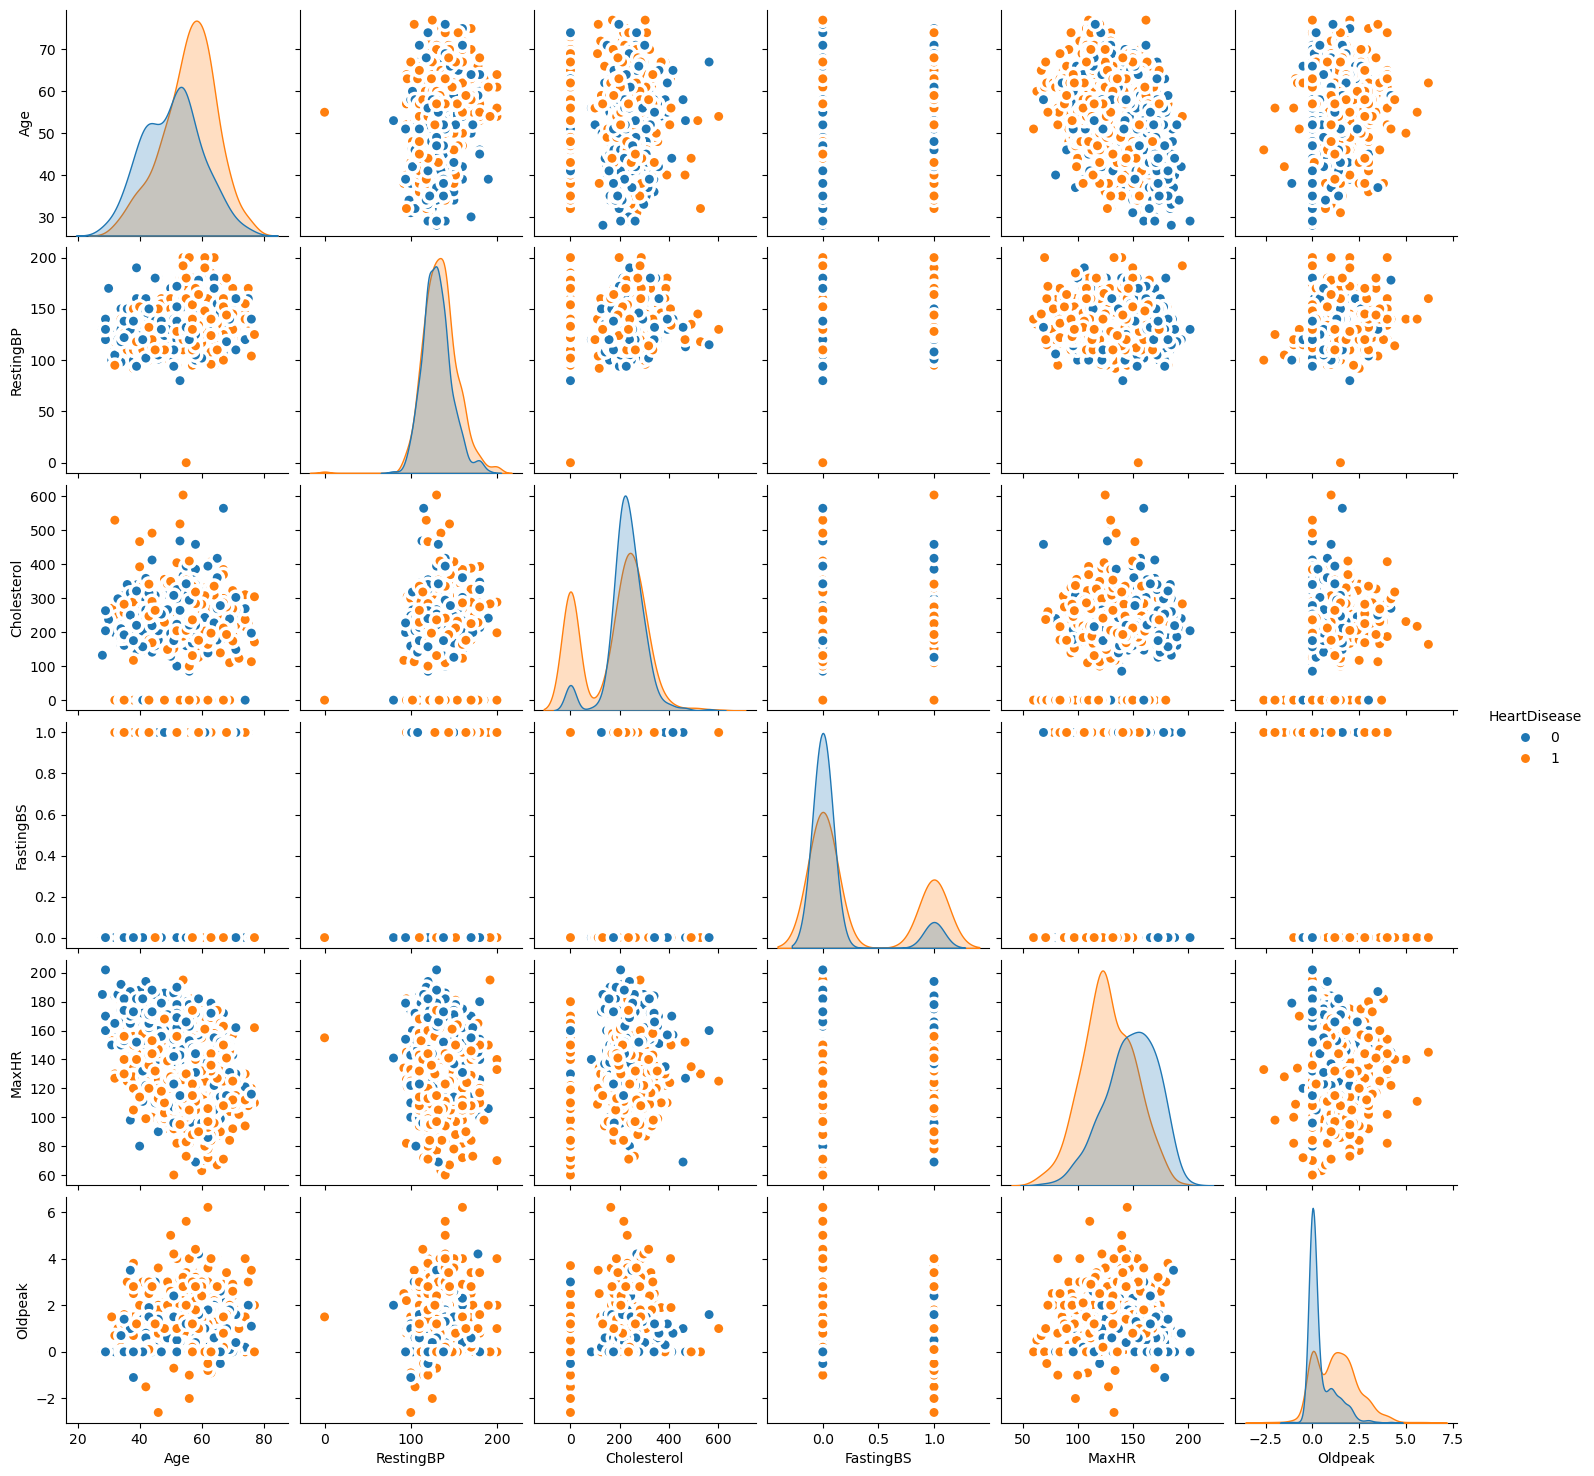

In [5]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data=heart, hue="HeartDisease", 
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

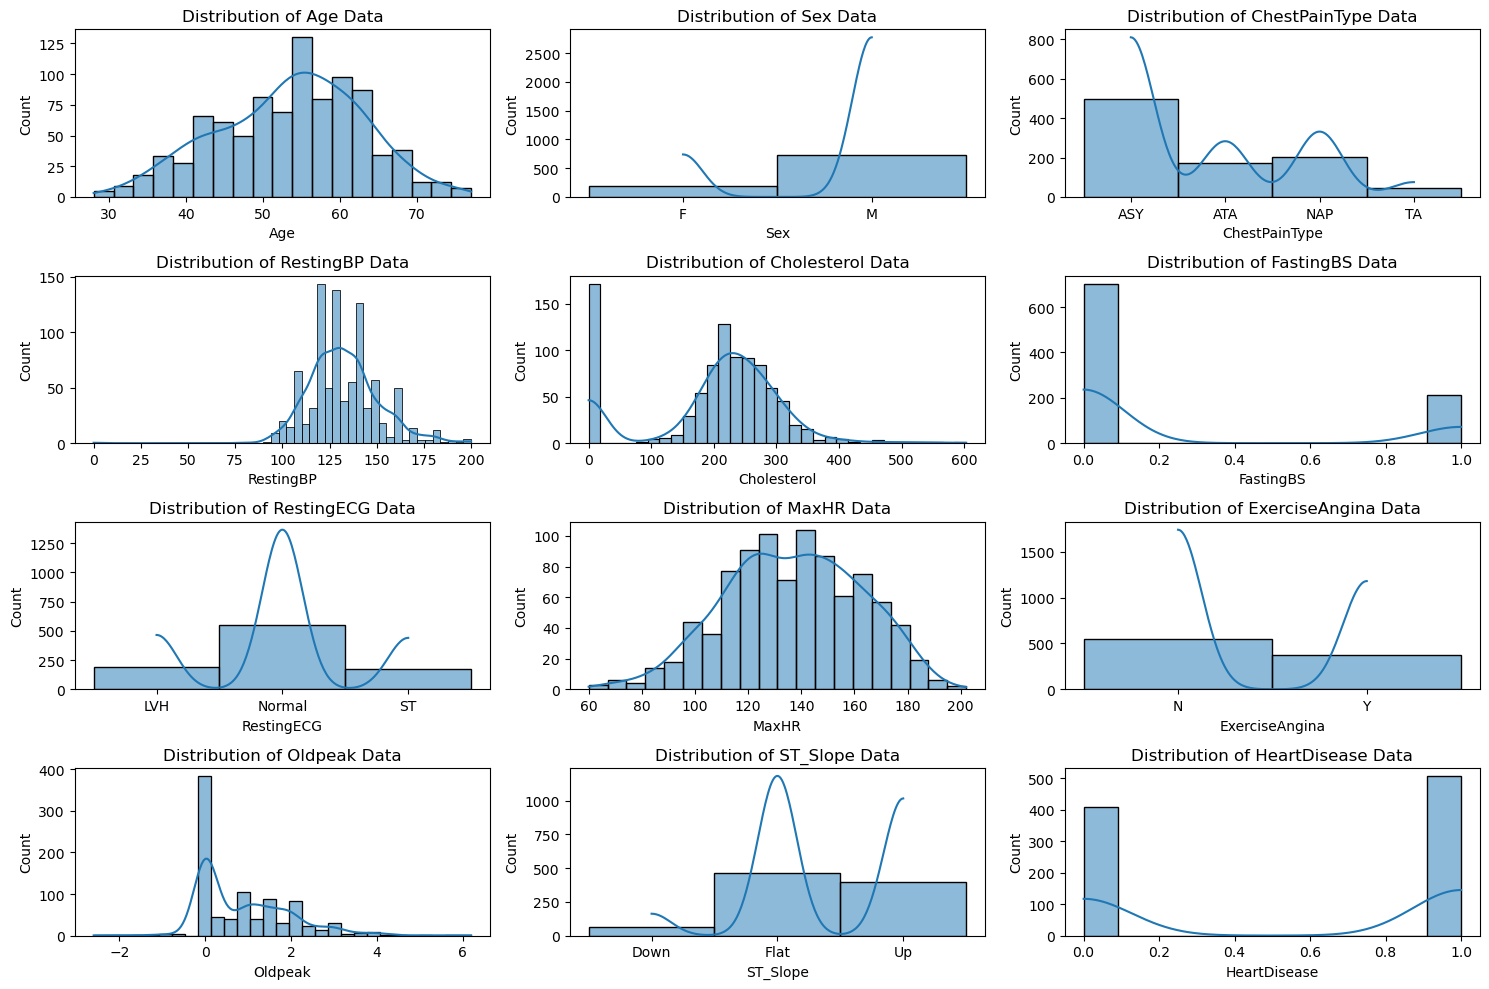

In [6]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [10]:
heart_encoded = pd.get_dummies(heart, drop_first=True)*1

target_field='HeartDisease'
        
# Split into train, validation and test
train_val, test = train_test_split(heart_encoded, test_size=0.2, random_state=42)

# Split train,validation into train and validation
train, validation = train_test_split(train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2 of total

X_train = train.drop(target_field, axis=1)
y_train = train[target_field]

X_test = test.drop(target_field, axis=1)
y_test = test[target_field]

X_val = validation.drop(target_field, axis=1)
y_val = validation[target_field]

# Check sizes
print(f"\nTotal dataset: {len(heart_encoded)}")
print(f"Train size: {len(train)}")
print(f"Validation size: {len(validation)}")
print(f"Test size: {len(test)}")


Total dataset: 918
Train size: 550
Validation size: 184
Test size: 184


In [13]:
from sklearn.preprocessing import MinMaxScaler

columns_a =  [col for col in quantitative_columns if col != target_field]

sc_feature = StandardScaler().fit(X_train[columns_a])  # Learn mean and std from only train set.
X_train[columns_a] = sc_feature.transform(X_train[columns_a])
X_val[columns_a] = sc_feature.transform(X_val[columns_a])
X_test[columns_a] = sc_feature.transform(X_test[columns_a])

'''mm_feature = MinMaxScaler().fit(X_train[columns_a])  # Learn mean and std from only train set.
X_train[columns_a] = mm_feature.transform(X_train[columns_a])
X_val[columns_a] = mm_feature.transform(X_val[columns_a])
X_test[columns_a] = mm_feature.transform(X_test[columns_a])'''

'''sc.fit(X_train[:, columns])  # Learn mean and std from only train set.
X_train[:, columns] = sc.transform(X_train[:, columns])
X_val[:, columns] = sc.transform(X_val[:, columns])
X_test[:, columns] = sc.transform(X_test[:, columns])'''

#TODO: show all histograms

display(X_train.describe())
display(X_val.describe())
display(X_test.describe())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,1.869212e-16,3.488119e-16,4.844610e-17,-4.683123e-17,-5.102989e-16,7.751375e-17,0.769091,0.190909,0.229091,0.049091,0.612727,0.180000,0.398182,0.500000,0.436364
std,1.000910e+00,1.000910e+00,1.000910e+00,1.000910e+00,1.000910e+00,1.000910e+00,0.421798,0.393375,0.420630,0.216255,0.487570,0.384537,0.489969,0.500455,0.496385
min,-2.569397e+00,-7.238609e+00,-1.845012e+00,-5.254542e-01,-2.926932e+00,-2.674862e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.836361e-01,-6.599583e-01,-2.104468e-01,-5.254542e-01,-7.271047e-01,-8.159106e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.971552e-02,-1.117374e-01,2.231187e-01,-5.254542e-01,1.086378e-01,-3.511728e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000
75%,6.783026e-01,4.364835e-01,6.497285e-01,-5.254542e-01,7.234368e-01,5.783028e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.459299e+00,3.725809e+00,2.495280e+00,1.903116e+00,2.529409e+00,4.389153e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,0.052562,0.224346,0.027455,0.108086,0.000881,0.100936,0.788043,0.184783,0.195652,0.027174,0.581522,0.228261,0.456522,0.565217,0.364130
std,0.920604,1.024481,1.014130,1.069316,0.888126,1.022345,0.409809,0.389180,0.397784,0.163034,0.494655,0.420857,0.499465,0.497081,0.482498
min,-2.045575,-2.030510,-1.845012,-0.525454,-2.542683,-3.232547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.578872,-0.550314,-0.168713,-0.525454,-0.563799,-0.815911,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.049716,0.217195,0.204570,-0.525454,-0.045062,0.113565,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.783067,0.792827,0.640454,1.903116,0.694618,0.671250,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.935477,3.725809,3.747287,1.903116,2.145160,4.946838,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,-0.060173,-0.126337,-0.034037,0.094887,0.121168,-0.056670,0.853261,0.184783,0.222826,0.076087,0.586957,0.201087,0.369565,0.440217,0.478261
std,1.016867,1.021021,1.058715,1.062002,0.994955,0.927843,0.354811,0.389180,0.417278,0.265861,0.493724,0.401907,0.484004,0.497768,0.500890
min,-2.674162,-2.852842,-1.845012,-0.525454,-2.504258,-1.838334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.788401,-0.659958,-0.307825,-0.525454,-0.544586,-0.815911,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.049716,-0.111737,0.209207,-0.525454,0.070213,-0.351173,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.678303,0.436483,0.568580,1.903116,0.915562,0.578303,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.354535,3.725809,3.385596,1.903116,2.260434,2.901992,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
import pickle


# exist or not. 
if not os.path.exists("./models"): 
    # then create it. 
    os.makedirs("./models") 
    
# Placeholder for results
results = []

# List to store serialized models
serialized_models = []  

# Train, tune, and evaluate models
roc_curves = {}

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Models and their hyperparameters
models = {
    "Logistic Regression": (LogisticRegression(), {"C": [0.01, 0.1, 1, 10]}),
    "k-NN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7, 9]}),
    "Linear SVM": (SVC(kernel="linear", probability=True), {"C": [0.01, 0.1, 1, 10]}),
    "Kernel SVM": (SVC(kernel="rbf", probability=True), {"C": [0.1, 1, 1000], "gamma": [0.01, 0.1, 1,10]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Decision Tree": (DecisionTreeClassifier(), {"max_depth": [3, 5, 7, None]}),
    "Random Forest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7, None]}),
    "Gradient Boosting": (GradientBoostingClassifier(), {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}),
    "XGBoost": (XGBClassifier(eval_metric='logloss'), {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]})
}

# Train, tune, and evaluate models
for name, (model, params) in models.items():
    start_time = time.perf_counter()
    print(f"Training {name}...")
    # Focus on recall in hyperparameter tuning
    grid = GridSearchCV(model, params, scoring="recall", cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)
    finish_time = time.perf_counter() - start_time
    
    best_model = grid.best_estimator_
    y_val_pred = best_model.predict(X_val)
    y_val_prob = best_model.predict_proba(X_val)[:, 1] if hasattr(best_model, 'predict_proba') else None
    
    # Serialize model and add to the list
    #serialized_models[name] = grid.best_estimator_
    pickle.dump(best_model, open(f'./models/{name}.dat', "wb"))

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    specificity = specificity_score(y_val, y_val_pred)

    # Store ROC curve for plotting if probability estimates are available
    if y_val_prob is not None:
        fpr, tpr, _ = roc_curve(y_val, y_val_prob)
        roc_auc = auc(fpr, tpr)
        roc_curves[name] = (fpr, tpr, roc_auc)
        
    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Sensitivity (Recall)": recall,
        "Specificity": specificity,
        "Precision": precision,
        "F1 Score": f1,
        "Training Time":f"{finish_time:.2f} seconds"
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
display(results_df)

Training Logistic Regression...
Training k-NN...
Training Linear SVM...
Training Kernel SVM...
Training Naive Bayes...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


,Model,Accuracy,Sensitivity (Recall),Specificity,Precision,F1 Score,Training Time
0,Logistic Regression,0.907609,0.962264,0.833333,0.886957,0.923077,1.83 seconds
1,k-NN,0.913043,0.952830,0.858974,0.901786,0.926606,0.05 seconds
2,Linear SVM,0.902174,0.952830,0.833333,0.885965,0.918182,0.07 seconds
3,Kernel SVM,0.581522,1.000000,0.012821,0.579235,0.733564,0.16 seconds
4,Naive Bayes,0.896739,0.933962,0.846154,0.891892,0.912442,0.01 seconds
5,Decision Tree,0.880435,0.962264,0.769231,0.850000,0.902655,0.03 seconds
6,Random Forest,0.902174,0.971698,0.807692,0.872881,0.919643,0.44 seconds
7,Gradient Boosting,0.880435,0.981132,0.743590,0.838710,0.904348,0.38 seconds
8,XGBoost,0.896739,0.933962,0.846154,0.891892,0.912442,0.19 seconds


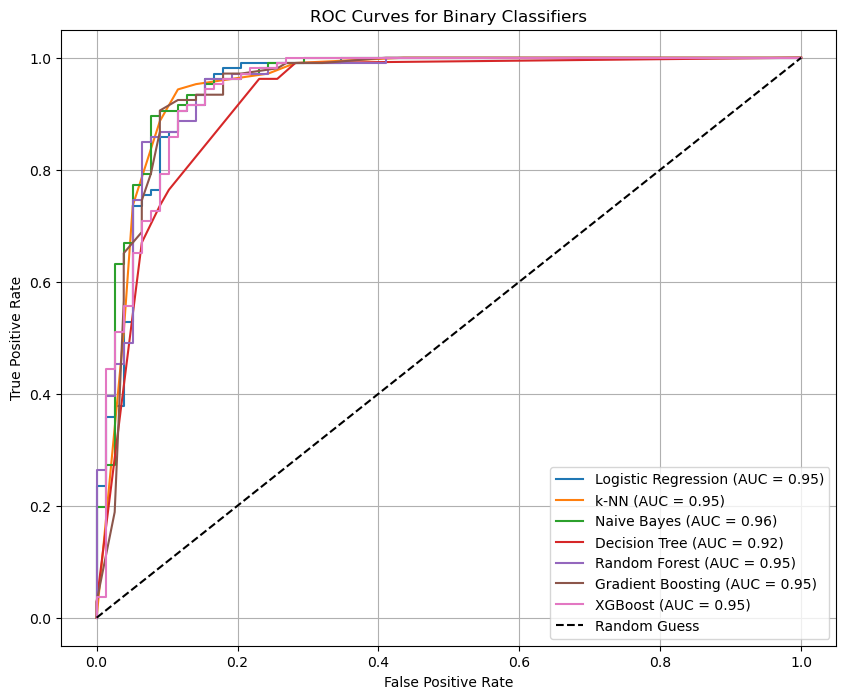

In [25]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    if "SVM" not in name:
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Binary Classifiers")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [26]:
# Focus on the model with the highest recall
best_model_name = results_df.loc[results_df['Sensitivity (Recall)'].idxmax(), 'Model']
print(f"The model with the highest recall is: {best_model_name}")

# Identify the model with the maximum recall value and show its metrics
best_model_metrics = results_df.loc[results_df['Sensitivity (Recall)'].idxmax()]
print("Best Model Metrics:")
print(best_model_metrics)

The model with the highest recall is: Kernel SVM
Best Model Metrics:
Model                     Kernel SVM
Accuracy                    0.581522
Sensitivity (Recall)             1.0
Specificity                 0.012821
Precision                   0.579235
F1 Score                    0.733564
Training Time           0.16 seconds
Name: 3, dtype: object


In [27]:
# Retrain the best model on the training data and evaluate on the test data
best_model = pickle.load(open(f"./models/{best_model_name}.dat", "rb"))
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

# Calculate test metrics
test_recall = recall_score(y_test, y_test_pred)
print(f"Test Recall for the best model ({best_model_name}): {test_recall:.4f}")

Test Recall for the best model (Kernel SVM): 1.0000


## Problem 2: Decision Tree (20 pts)

1) Take the decision tree (single tree) model you trained in the previous problem and plot the tree itself.
2) Create the feature importance plot.
3) Take the most important two features (call them X[0] and X[1]) by looking at the feature importance plot and make a 2D decision boundary plot similar to the one below. (Note: the plot below belongs to a different dataset; it's shown here just as an example.)

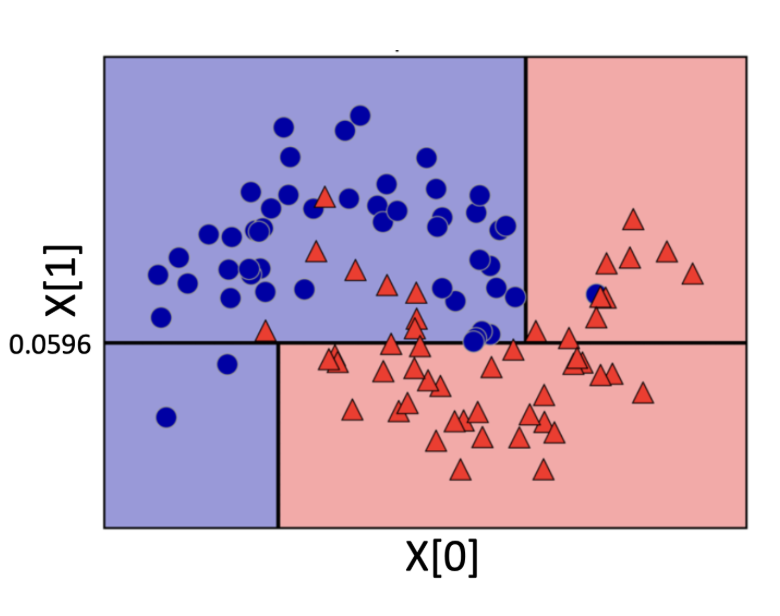

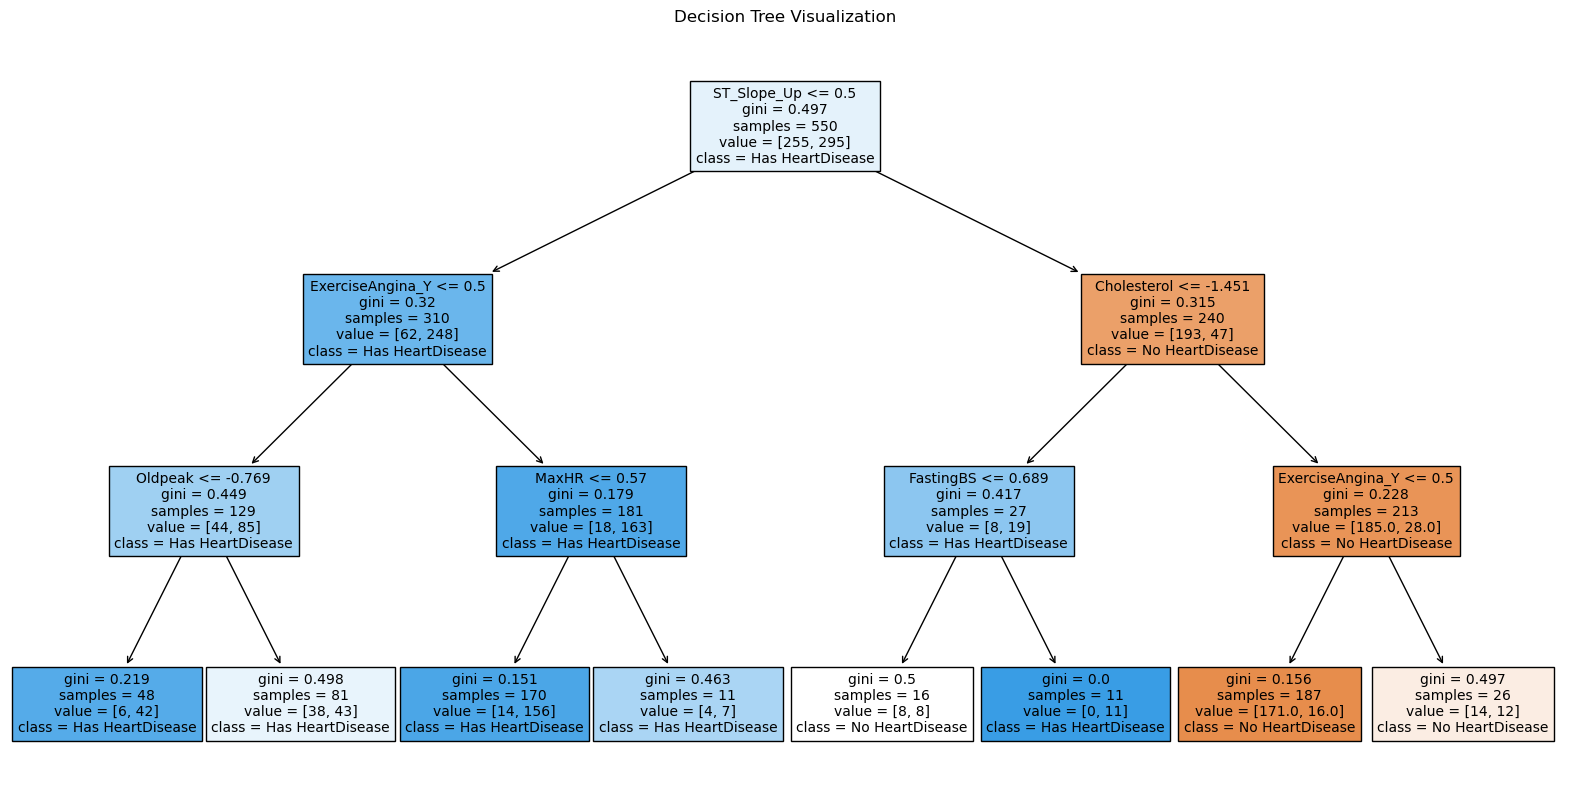

In [28]:
from sklearn.tree import plot_tree

# 1) Plot the decision tree
decision_tree = pickle.load(open(f"./models/Decision Tree.dat", "rb"))

# 1) Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X_train.columns, class_names=["No HeartDisease", "Has HeartDisease"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

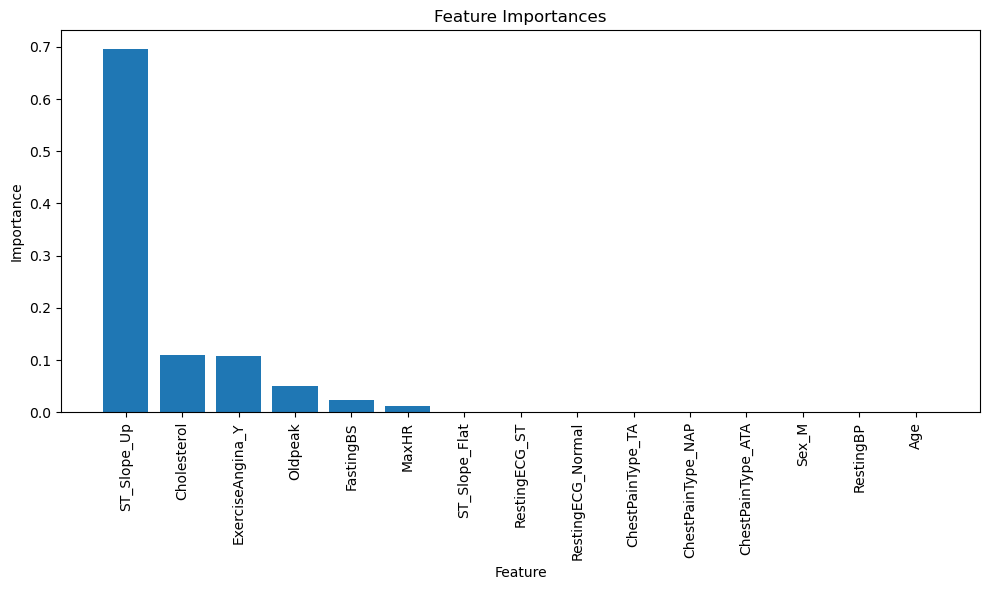

In [29]:
# 2) Create the feature importance plot
feature_importances = decision_tree.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## Problem 3: Decision boundary in logistic regression (10 pts)

Let's say you trained a logistic regression model on a dataset (not the heart disease dataset; this problem is independent of the ones above). The parameters turn out to be $\beta_0 = 2$, $\beta_1 = -3$ and $\beta_2 = 7$. Use algebra (no coding) to find the equation of the line that defines the decision boundary.

Our boundry will satisfy the equation below;

$$
\begin{align}
    & \beta_0 + \beta_1.x_1 + \beta_2.x_2 = 0 \\
    & \beta_2.x_2 = -\beta_0 - \beta_1.x_1 \\
    & x_2 = -\frac{\beta_0}{\beta_2} -\frac{\beta_1.x_1}{\beta_2} \\
\end{align}
$$


Putting the $\beta$'s in place;

$$
x_2 = -\frac{2}{7} +\frac{3}{7}.x_1
$$